In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import tensorflow as tf


## Open Source Deep Learning Frameworks

Deep learnings is made accessible by a number of open source projects. Some of the most popular technologies include, but are not limited to, Deeplearning4j (DL4j), Theano, Torch, TensorFlow, and Caffe. The deciding factors on which one to use are the tech stack they target, and if they are low-level, academic, or application focused. Here’s an overview of each:

DL4J:

   * JVM-based
   * Distrubted
   * Integrates with Hadoop and Spark
   
   
Theano:

   * Very popular in Academia
   * Fairly low level
   * Interfaced with via Python and Numpy


Torch:

   * Lua based
   * In house versions used by Facebook and Twitter
   * Contains pretrained models


TensorFlow:

   * Google written successor to Theano
   * Interfaced with via Python and Numpy
   * Highly parallel
   * Can be somewhat slow for certain problem sets



Caffe:

   * Not general purpose. Focuses on machine-vision problems
   * Implemented in C++ and is very fast
   * Not easily extensible
   * Has a Python interface

## Brief installation of Tensorflow

>TensorFlow is tested and supported on the following 64-bit systems:

>1.Ubuntu 16.04 or later

>2.Windows 7 or later

>3.macOS 10.12.6 (Sierra) or later (no GPU support)

>4.Raspbian 9.0 or later

> **pip install tensorflow==2.0.0**

> To run from Anaconda Prompt

> **!pip install tensorflow==2.0.0**

> To run from Jupyter Notebook

`Both Tensorflow 2.0 and Keras have been released for four years (Keras was released in March 2015, and Tensorflow was released in November of the same year). The rapid development of deep learning in the past days, we also know some problems of Tensorflow1.x and Keras:`

* Using Tensorflow means programming static graphs, which is difficult and inconvenient for programs that are familiar with imperative programming

* Tensorflow api is powerful and flexible, but it is more complex, confusing and difficult to use.

* Keras api is productive and easy to use, but lacks flexibility for research


#### Official docs link for [DETAILED INSTALLATION STEPS](https://www.tensorflow.org/install) for Tensorflow 2

In [5]:
print(f"Tensorflow Version: {tf.__version__}")
print(f"Keras Version: {tf.keras.__version__}")

Tensorflow Version: 2.4.1
Keras Version: 2.4.0


`Tensorflow2.0 is a combination design of Tensorflow1.x and Keras. Considering user feedback and framework development over the past four years, it largely solves the above problems and will become the future machine learning platform.`

> Tensorflow 2.0 is built on the following core ideas:


* The coding is more pythonic, so that users can get the results immediately like they are programming in numpy
* Retaining the characteristics of static graphs (for performance, distributed, and production deployment), this makes TensorFlow fast, scalable, and ready for production.
* Using Keras as a high-level API for deep learning, making Tensorflow easy to use and efficient
* Make the entire framework both high-level features (easy to use, efficient, and not flexible) and low-level features (powerful and scalable, not easy to use, but very flexible)

>Eager execution is by default in TensorFlow 2.0 and, it needs no special setup.

>The following below code can be used to find out whether a CPU or GPU is in use

In [6]:
tf.config.list_physical_devices('GPU'),tf.config.list_physical_devices('CPU')

([], [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')])

In [7]:
CheckList = ["GPU", "CPU"]
for device in CheckList:
    out_ = tf.config.list_physical_devices(device)    
    if len(out_) > 0:
        print(f"{device} is available")        
        print("details\n",out_)
    else:
        print(f"{device} not available")

GPU not available
CPU is available
details
 [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


# Keras, a High-Level API for TensorFlow 2

## The Keras Sequential model

`To build a Keras Sequential model, you add layers to it in the same order that you want the computations to be undertaken by the network.`

`After you have built your model, you compile it; this optimizes the computations that are to be undertaken, and is where you allocate the optimizer and the loss function you want your model to use.`

`The next stage is to fit the model to the data. This is commonly known as training the model, and is where all the computations take place. It is possible to present the data to the model either in batches, or all at once.`

`Next, you evaluate your model to establish its accuracy, loss, and other metrics. Finally, having trained your model, you can use it to make predictions on new data. So, the workflow is: build, compile, fit, evaluate, make predictions.`

`There are two ways to create a Sequential model. Let's take a look at each of them.`

### Using Sequential model

`Firstly, you can pass a list of layer instances to the constructor, as in the following example.For now, we will just explain enough to allow you to understand what is happening here.`

`Acquire the data. MNIST is a dataset of hand-drawn numerals, each on a 28 x 28 pixel grid. Every individual data point is an unsigned 8-bit integer (uint8), as are the labels:`

### Working on mnist dataset - 

* This dataset contains handwritten digits. 
* It has 10 classes i.e. 0 to 9
* Each data point is 2D array of 28x28 size.
* Also known as hello world dataset for ANN

[image source](https://en.wikipedia.org/wiki/MNIST_database#/media/File:MnistExamples.png)

![](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

#### Loading the datset

In [43]:
# Keras has already contains mnist dataset 
# Loading mnist data using Keras

mnist_data = tf.keras.datasets.mnist
(train_xf,train_yf), (test_x, test_y) = mnist_data.load_data()

#### Definning the variables

In [9]:
print(f"data type of X_train_full: {train_x.dtype},\nshape of X_train_full: {train_x.shape}")

data type of X_train_full: uint8,
shape of X_train_full: (60000, 28, 28)


In [10]:
train_x.shape,train_y.shape

((60000, 28, 28), (60000,))

<AxesSubplot:>

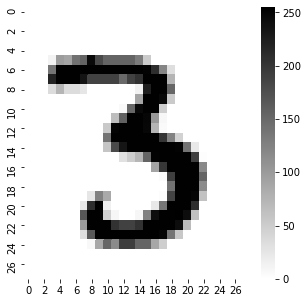

In [11]:
plt.rcParams['figure.figsize'] = (5,5)
sns.heatmap(train_x[12],cmap='binary')

In [12]:
plt.rcParams['figure.figsize'] = (40,40)
sns.heatmap(train_x[12],annot=True,cmap='binary')
plt.close()

In [13]:
epochs=10
batch_size = 32

In [44]:
valid_x, train_x = train_xf[:5000], train_xf[5000:]
valid_y, train_y = train_yf[:5000], train_yf[5000:]

# normalize all the data points and cast the labels to int64
train_x, test_x, valid_x = tf.cast(train_x/255.0, tf.float32), tf.cast(test_x/255.0, tf.float32), tf.cast(valid_x/255.0, tf.float32) # we are using 255 to normalize, because the value in the each element in the 28X28 matrix range from 0 to 255, an since in normalization we convert all the values between 0 and 1, we have to divide each element by 255.
train_y, test_y, valid_y = tf.cast(train_y,tf.int64),tf.cast(test_y,tf.int64),tf.cast(valid_y,tf.int64)

In [45]:
train_x.shape, test_x.shape, valid_x.shape,train_y.shape, test_y.shape, valid_y.shape

(TensorShape([55000, 28, 28]),
 TensorShape([10000, 28, 28]),
 TensorShape([5000, 28, 28]),
 TensorShape([55000]),
 TensorShape([10000]),
 TensorShape([5000]))

## First Method

#### Building the Architecture 

In [15]:
# mnistmodel1 = tf.keras.models.Sequential([
# tf.keras.layers.Flatten(),
# tf.keras.layers.Dense(512,activation=tf.nn.relu),
# tf.keras.layers.Dropout(0.2),
# tf.keras.layers.Dense(10,activation=tf.nn.softmax)
# ])

LAYERS = [tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.Dense(375, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dropout(0.2),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")]

model_clf = tf.keras.models.Sequential(LAYERS)

- #### Altenative 1

```python
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

```

- #### Alternative 2

```python
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])
```

### For custom weights initialiser or setting weights 
refer [here](https://keras.io/api/layers/base_layer/#setweights-method)

In [16]:
model_clf.layers

In [30]:
model_clf.layers[1].name

'hiddenLayer1'

In [31]:
temp = model_clf.layers[1].name
model_clf.get_layer(temp)

In [17]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputLayer (Flatten)         (None, 784)               0         
_________________________________________________________________
hiddenLayer1 (Dense)         (None, 375)               294375    
_________________________________________________________________
dropout (Dropout)            (None, 375)               0         
_________________________________________________________________
hiddenLayer2 (Dense)         (None, 100)               37600     
_________________________________________________________________
outputLayer (Dense)          (None, 10)                1010      
Total params: 332,985
Trainable params: 332,985
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Trainable parameters for layer 1
((28*28)*(375)+(375))
#  (784)*(375)+(375)
# Input layer neurons * hidden layer 1 neurons + biases for each layer 1 neuron

294375

In [23]:
# Trainable parameters for layer 2
375*100+100
# firsLayer * secondLayer + bias

37600

In [32]:
# Trainable parameters for output layer
100*10+10
# firsLayer * secondLayer + bias

1010

#### Weights

In [34]:
hidden1 = model_clf.layers[1]
# hidden1.set_weights(hidden1.get_weights()) # to set weights
len(hidden1.get_weights())

2

1(first) for the weights and 1(second) for bias

In [37]:
len(hidden1.get_weights()[0]),len(hidden1.get_weights()[0][1]) # total wieghts -> 784 x 375

(784, 375)

In [39]:
len(hidden1.get_weights()[1]) # bais

375

In [40]:
hidden1.get_weights()

[array([[ 0.05346685, -0.03748457, -0.04859137, ...,  0.00943509,
         -0.06175772, -0.06434795],
        [-0.05713956,  0.0237309 , -0.00903531, ...,  0.03179293,
          0.01412773, -0.0227605 ],
        [-0.05233333,  0.00393882, -0.01516113, ...,  0.07177218,
          0.03491049, -0.03267998],
        ...,
        [ 0.03085117,  0.05886733,  0.05639973, ...,  0.01053528,
          0.02899049, -0.04378618],
        [ 0.03158359,  0.00573692, -0.03226117, ..., -0.01280283,
          0.05585378, -0.06702942],
        [ 0.00692666,  0.01618131,  0.06363723, ..., -0.04328531,
         -0.06303182, -0.05835322]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

`Here we can see the weigths are initialized randomly and the bias to 0`

#### Compiling the model

In [49]:
# optimiser = tf.keras.optimizers.Adam()
# mnistmodel1.compile (optimizer= optimiser, loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)



#### Alternatively 
```python
model_clf.compile(loss=tf.losses.sparse_categorical_crossentropy,
               optimizer=tf.keras.optimizers.SGD(0.02),
               metrics=["accuracy"])
```

#### Fitting the model

X_train.shape, 55000/32, batch size=32 by default

In [78]:
# mnistmodel1.fit(train_x, train_y, batch_size=32, epochs=5)

EPOCHS = 40
VALIDATION_SET = (valid_x, valid_y)

history = model_clf.fit(train_x, train_y, epochs=EPOCHS,validation_data=VALIDATION_SET)

Epoch 1/40
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0085 - accuracy: 0.9979 - val_loss: 0.0574 - val_accuracy: 0.9846
Epoch 2/40
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0088 - accuracy: 0.9977 - val_loss: 0.0585 - val_accuracy: 0.9856
Epoch 3/40
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0078 - accuracy: 0.9985 - val_loss: 0.0588 - val_accuracy: 0.9852
Epoch 4/40
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0085 - accuracy: 0.9981 - val_loss: 0.0583 - val_accuracy: 0.9846
Epoch 5/40
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0077 - accuracy: 0.9982 - val_loss: 0.0571 - val_accuracy: 0.9850
Epoch 6/40
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0078 - accuracy: 0.9983 - val_loss: 0.0570 - val_accuracy: 0.9862
Epoch 7/40
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0077 - accuracy: 0.9983 - val_loss: 0.0581 - val_accuracy:

> First Iteration :: loss: 1.0551 - accuracy: 0.7095 - val_loss: 0.3045 - val_accuracy: 0.9134
 
> Last Iteration :: loss: 0.0425 - accuracy: 0.9874 - val_loss: 0.0604 - val_accuracy: 0.9832

#### Evaluate the mnistmodel1

In [51]:
model_clf.evaluate(test_x, test_y)

313/313 [==============================] - 0s 911us/step - loss: 0.0636 - accuracy: 0.9790


[0.06358089298009872, 0.9789999723434448]

#### `history` Variable

In [52]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [53]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.647076,0.824018,0.304484,0.9134
1,0.317200,0.907727,0.235602,0.9348
2,0.258216,0.925073,0.197663,0.9468
3,0.218537,0.936145,0.168160,0.9528
4,0.189729,0.945400,0.149142,0.9586
5,0.168802,0.950764,0.132582,0.9632
6,0.152725,0.954418,0.122250,0.9654
7,0.138759,0.959345,0.111253,0.9696
8,0.126095,0.963255,0.105294,0.9722
9,0.117872,0.965582,0.099051,0.9720


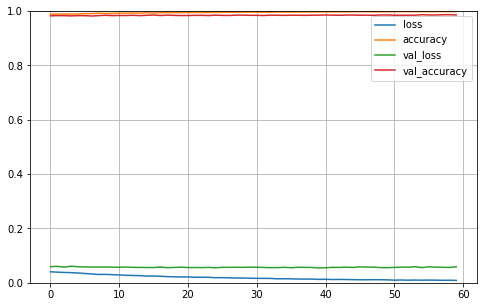

In [77]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Now these graph play an very important role, as we can analyze and observe that after 20 iterations the model is not drastically improving.

#### Prediction

In [57]:
X_new = test_x[:3]
y_proba = model_clf.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [58]:
y_pred = np.argmax(model_clf.predict(X_new), axis=-1)
y_pred

array([7, 2, 1], dtype=int64)

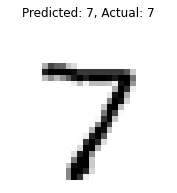

------------------------------------------------------------


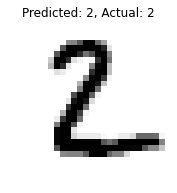

------------------------------------------------------------


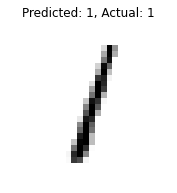

------------------------------------------------------------


In [64]:
plt.rcParams['figure.figsize'] = (3,3)
for data, pred, actual in zip(X_new, y_pred, test_y[:3]):
    plt.imshow(data, cmap="binary")
    plt.title(f"Predicted: {pred}, Actual: {actual}")
    plt.axis('off')
    plt.show()
    print("---"*20)

### Saving model

In [67]:
import time
import os

def saveModel_path(model_dir="SAVED_MODELS"):
    os.makedirs(model_dir, exist_ok=True)
    fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")    
    model_path = os.path.join(model_dir, fileName)
    print(f"your model will be saved at the following location\n{model_path}")
    return model_path
# This is an auto name saveing function
UNIQUE_PATH = model_clf.save(saveModel_path())

In [69]:
# But for the time being we are going to save it normally
UNIQUE_PATH = model_clf.save('saved_models/model1/model1.h5')

>This represents a loss of 0.09 and an accuracy of 0.9801 on the test data. 

>An accuracy of 0.98 means that out of 100 test data points, 98 were, on average, correctly identified by the model.

- ## The second way to create a Sequential model
The alternative to passing a list of layers to the Sequential model's constructor is to use the add method, as follows, for the same architecture:



#### Building the Architecture & Compiling

In [ ]:
mnistmodel2 = tf.keras.models.Sequential();
mnistmodel2.add(tf.keras.layers.Flatten())
mnistmodel2.add(tf.keras.layers.Dense(512, activation='relu'))
mnistmodel2.add(tf.keras.layers.Dropout(0.2))
mnistmodel2.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))
mnistmodel2.compile (optimizer= tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy',metrics = ['accuracy'])

#### Fitting the mnistmodel2

In [ ]:
mnistmodel2.fit(train_x, train_y, batch_size=64, epochs=5)

#### Evaluate the mnistmodel2

In [ ]:
mnistmodel2.evaluate(test_x, test_y)

# Keras functional API

`The functional API lets you build much more complex architectures than the simple linear stack of Sequential models we have seen previously. It also supports more advanced models. These models include multi-input and multi-output models, models with shared layers, and models with residual connections.`

In [ ]:
mnist = tf.keras.datasets.mnist
(train_x,train_y), (test_x, test_y) = mnist.load_data()
train_x, test_x = train_x/255.0, test_x/255.0
epochs=10

#### Building the Architecture

In [70]:
inputs = tf.keras.Input(shape=(28,28)) # Returns a 'placeholder' tensor
x = tf.keras.layers.Flatten()(inputs)
x = tf.keras.layers.Dense(512, activation='relu',name='d1')(x)
x = tf.keras.layers.Dropout(0.2)(x)
predictions = tf.keras.layers.Dense(10,activation=tf.nn.softmax, name='d2')(x)
mnistmodel3 = tf.keras.Model(inputs=inputs, outputs=predictions)

In [71]:
mnistmodel3.layers

#### Compile & Fit

In [ ]:
optimiser = tf.keras.optimizers.Adam()
mnistmodel3.compile (optimizer= optimiser, loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
mnistmodel3.fit(train_x, train_y, batch_size=32, epochs=epochs)

#### Evaluate the mnistmodel3

In [ ]:
mnistmodel3.evaluate(test_x, test_y)

### Subclassing the Keras Model class

#### Building the subclass architecture

In [ ]:
class MNISTModel(tf.keras.Model):
    def __init__(self, num_classes=10):
        super(MNISTModel, self).__init__()
        # Define your layers here.
        inputs = tf.keras.Input(shape=(28,28)) # Returns a placeholder tensor
        self.x0 = tf.keras.layers.Flatten()
        self.x1 = tf.keras.layers.Dense(512, activation='relu',name='d1')
        self.x2 = tf.keras.layers.Dropout(0.2)
        self.predictions = tf.keras.layers.Dense(10,activation=tf.nn.softmax, name='d2')


    def call(self, inputs):
    # This is where to define your forward pass
    # using the layers previously defined in `__init__`
        x = self.x0(inputs)
        x = self.x1(x)
        x = self.x2(x)
        return self.predictions(x)

In [ ]:
mnistmodel4 = MNISTModel()

#### Compile & Fit

In [ ]:
batch_size = 32
steps_per_epoch = len(train_x.numpy())//batch_size # this is an floor division operator
print(steps_per_epoch)
mnistmodel4.compile (optimizer= tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy',metrics = ['accuracy'])
mnistmodel4.fit(train_x, train_y, batch_size=batch_size, epochs=epochs)

#### Evaluate the mnistmodel4

In [ ]:
mnistmodel4.evaluate(test_x, test_y)

# Using Data pipelines

> Data may also be passed into the fit method as a tf.data.Dataset() iterator
> The from_tensor_slices() method converts the NumPy arrays into a dataset
> The batch() and shuffle() methods chained together. 

>Next, the map() method invokes a method on the input images, x, that randomly flips one in two of them across
the y-axis, effectively increasing the size of the image set

>Finally, the repeat() method means that the dataset will be re-fed from the beginning when its end is
reached (continuously)

In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(train_x,train_y), (test_x, test_y) = mnist.load_data()
train_x, test_x = train_x/255.0, test_x/255.0
epochs=10

In [3]:
batch_size = 32
buffer_size = 10000
training_dataset = tf.data.Dataset.from_tensor_slices((train_x, train_y)).batch(32).shuffle(10000)
training_dataset = training_dataset.map(lambda x, y: (tf.image.random_flip_left_right(x), y))
training_dataset = training_dataset.repeat()

In [5]:
testing_dataset = tf.data.Dataset.from_tensor_slices((test_x, test_y)).batch(batch_size).shuffle(10000)
testing_dataset = training_dataset.repeat()

#### Building the model architecture

In [6]:
#Now in the fit() function, we can pass the dataset directly in, as follows:
model5 = tf.keras.models.Sequential([
 tf.keras.layers.Flatten(),
 tf.keras.layers.Dense(512,activation=tf.nn.relu),
 tf.keras.layers.Dropout(0.2),
 tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

#### Compiling the model

In [7]:
steps_per_epoch = len(train_x)//batch_size #required becuase of the repeat() on the dataset
optimiser = tf.keras.optimizers.Adam()
model5.compile (optimizer= optimiser, loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

#### Fitting the model

In [8]:
model5.fit(training_dataset, epochs=epochs, steps_per_epoch = steps_per_epoch)

Train for 1875 steps
Epoch 1/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3603 - accuracy: 0.8916
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1780 - accuracy: 0.9455
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1355 - accuracy: 0.9585
Epoch 4/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1149 - accuracy: 0.9635
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1004 - accuracy: 0.9681
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0906 - accuracy: 0.9719
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0801 - accuracy: 0.9748
Epoch 8/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0747 - accuracy: 0.9759
Epoch 9/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0686 - accuracy: 0.9783
Epoch 10/10
1875/1875 [=============================

#### Evaluating the model

In [9]:
model5.evaluate(testing_dataset,steps=10)

10/10 [==============================] - 1s 52ms/step - loss: 0.0301 - accuracy: 0.9937


[0.030064156164735324, 0.99375]

In [10]:
import datetime as dt
callbacks = [
  # Write TensorBoard logs to `./logs` directory
  tf.keras.callbacks.TensorBoard(log_dir='log/{}/'.format(dt.datetime.now().strftime("%Y-%m-%d-%H-%M-%S")))
]

In [11]:
model5.fit(training_dataset, epochs=epochs, steps_per_epoch=steps_per_epoch,
          validation_data=testing_dataset,
          validation_steps=3)

Train for 1875 steps, validate for 3 steps
Epoch 1/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0607 - accuracy: 0.9803 - val_loss: 0.0050 - val_accuracy: 1.0000
Epoch 2/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0574 - accuracy: 0.9811 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 3/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0547 - accuracy: 0.9822 - val_loss: 0.0382 - val_accuracy: 0.9792
Epoch 4/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0507 - accuracy: 0.9837 - val_loss: 0.0241 - val_accuracy: 0.9792
Epoch 5/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0498 - accuracy: 0.9839 - val_loss: 0.0031 - val_accuracy: 1.0000
Epoch 6/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0449 - accuracy: 0.9853 - val_loss: 0.0312 - val_accuracy: 0.9792
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0450 - a

#### Evaluating

In [12]:
model5.evaluate(testing_dataset,steps=10)

10/10 [==============================] - 0s 45ms/step - loss: 0.0150 - accuracy: 0.9937


[0.015026384776138001, 0.99375]

## Saving and loading Keras models

>The Keras API in TensorFlow has the ability to save and restore models easily. This is done as follows, and saves the model in the current directory. Of course, a longer path may be passed here:

#### Saving a model
    
`model.save('./model_name.h5')`

>This will save the model architecture, its weights, its training state (loss, optimizer), and the state of the optimizer, so that you can carry on training the model from where you left off.


>Loading a saved model is done as follows. Note that if you have compiled your model, the load will compile your model using the saved training configuration:

#### Loding a model

`from tensorflow.keras.models import load_model
new_model = load_model('./model_name.h5')`

>It is also possible to save just the model weights and load them with this (in which case, you must build your architecture to load the weights into):

#### Saving the model weights only
    
    `model.save_weights('./model_weights.h5')`
    
>Then use the following to load it:

#### Loding the weights
    
    `model.load_weights('./model_weights.h5')`

# Keras datasets

>The following datasets are available from within Keras: boston_housing, cifar10, cifar100, fashion_mnist, imdb, mnist,and reuters.

>They are all accessed with the function.

`load_data()`  

>For example, to load the fashion_mnist dataset, use the following:

`(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()`

![title](img/dataset.png)

### Using NumPy arrays with datasets

In [13]:
import tensorflow as tf
import numpy as np
number_items = 11
number_list1 = np.arange(number_items)
number_list2 = np.arange(number_items,number_items*2)

#### Create datasets, using the from_tensor_slices() method

In [14]:
number_list1_dataset = tf.data.Dataset.from_tensor_slices(number_list1)

#### Create an iterator on it using the make_one_shot_iterator() method:

In [15]:
iterator = tf.compat.v1.data.make_one_shot_iterator(number_list1_dataset)

#### Using them together, with the get_next method:

In [16]:
for item in number_list1_dataset:
    number = iterator.get_next().numpy()
    print(number)


0
1
2
3
4
5
6
7
8
9
10


>Note that executing this code twice in the same program run will raise an error because we are using a one-shot iterator

#### It's also possible to access the data in batches() with the batch method. Note that the first argument is the number of elements to put in each batch and the second is the self-explanatory drop_remainder argument:

In [18]:
number_list1_dataset = tf.data.Dataset.from_tensor_slices(number_list1).batch(3, drop_remainder = False)
iterator = tf.compat.v1.data.make_one_shot_iterator(number_list1_dataset)
for item in number_list1_dataset:
    number = iterator.get_next().numpy()
    print(number)

[0 1 2]
[3 4 5]
[6 7 8]
[ 9 10]


### There is also a zip method, which is useful for presenting features and labels together:

In [19]:
data_set1 = [1,2,3,4,5]
data_set2 = ['a','e','i','o','u']
data_set1 = tf.data.Dataset.from_tensor_slices(data_set1)
data_set2 = tf.data.Dataset.from_tensor_slices(data_set2)
zipped_datasets = tf.data.Dataset.zip((data_set1, data_set2))
iterator = tf.compat.v1.data.make_one_shot_iterator(zipped_datasets)
for item in zipped_datasets:
    number = iterator.get_next()
    print(number)


(<tf.Tensor: shape=(), dtype=int32, numpy=1>, <tf.Tensor: shape=(), dtype=string, numpy=b'a'>)
(<tf.Tensor: shape=(), dtype=int32, numpy=2>, <tf.Tensor: shape=(), dtype=string, numpy=b'e'>)
(<tf.Tensor: shape=(), dtype=int32, numpy=3>, <tf.Tensor: shape=(), dtype=string, numpy=b'i'>)
(<tf.Tensor: shape=(), dtype=int32, numpy=4>, <tf.Tensor: shape=(), dtype=string, numpy=b'o'>)
(<tf.Tensor: shape=(), dtype=int32, numpy=5>, <tf.Tensor: shape=(), dtype=string, numpy=b'u'>)


#### We can concatenate two datasets as follows, using the concatenate method:

In [21]:
datas1 = tf.data.Dataset.from_tensor_slices([1,2,3,5,7,11,13,17])
datas2 = tf.data.Dataset.from_tensor_slices([19,23,29,31,37,41])
datas3 = datas1.concatenate(datas2)
print(datas3)
iterator = tf.compat.v1.data.make_one_shot_iterator(datas3)
for i in range(14):
    number = iterator.get_next()
    print(number)


<ConcatenateDataset shapes: (), types: tf.int32>
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(11, shape=(), dtype=int32)
tf.Tensor(13, shape=(), dtype=int32)
tf.Tensor(17, shape=(), dtype=int32)
tf.Tensor(19, shape=(), dtype=int32)
tf.Tensor(23, shape=(), dtype=int32)
tf.Tensor(29, shape=(), dtype=int32)
tf.Tensor(31, shape=(), dtype=int32)
tf.Tensor(37, shape=(), dtype=int32)
tf.Tensor(41, shape=(), dtype=int32)


#### We can also do away with iterators altogether, as shown here:

In [22]:
epochs=2
for e in range(epochs):
    for item in datas3:
        print(item)


tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(11, shape=(), dtype=int32)
tf.Tensor(13, shape=(), dtype=int32)
tf.Tensor(17, shape=(), dtype=int32)
tf.Tensor(19, shape=(), dtype=int32)
tf.Tensor(23, shape=(), dtype=int32)
tf.Tensor(29, shape=(), dtype=int32)
tf.Tensor(31, shape=(), dtype=int32)
tf.Tensor(37, shape=(), dtype=int32)
tf.Tensor(41, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(11, shape=(), dtype=int32)
tf.Tensor(13, shape=(), dtype=int32)
tf.Tensor(17, shape=(), dtype=int32)
tf.Tensor(19, shape=(), dtype=int32)
tf.Tensor(23, shape=(), dtype=int32)
tf.Tensor(29, shape=(), dtype=int32)
tf.Tensor(31, shape=(), dtype=int32)
tf.Tensor(37, shape=(), dtype=int32)
tf.Tensor(4

### Using comma-separated value (CSV)files with datasets.

>CSV files are a very popular method of storing data. TensorFlow 2 contains flexible methods for dealing with them. 

>The main method here is tf.data.experimental.CsvDataset.

#### CSV Example 1

>With the following arguments, our dataset will consist of two items taken from each row of the
filename file, both of the float type, with the first line of the file ignored and columns 1 and 2 used
(column numbering is, of course, 0-based):


In [24]:
filename = ["./size_1000.csv"]
record_defaults = [tf.float32] * 2 # two required float columns
data_set = tf.data.experimental.CsvDataset(filename, record_defaults, header=True, select_cols=[1,2])
for item in data_set:
    print(item)

#### #CSV example 2

In [ ]:

In this example, and with the following arguments, our dataset will consist of one required float,
one optional float with a default value of 0.0, and an int, where there is no header in the CSV file and
only columns 1, 2, and 3 are imported:
#file Chapter_2.ipynb


In [22]:
filename = "mycsvfile.txt"
record_defaults = [tf.float32, tf.constant([0.0], dtype=tf.float32), tf.int32,]
data_set = tf.data.experimental.CsvDataset(filename, record_defaults, header=False, select_cols=[1,2,3])
for item in data_set:
    print(item)

(<tf.Tensor: shape=(), dtype=float32, numpy=428000.0>, <tf.Tensor: shape=(), dtype=float32, numpy=555.0>, <tf.Tensor: shape=(), dtype=int32, numpy=42>)
(<tf.Tensor: shape=(), dtype=float32, numpy=-5.3>, <tf.Tensor: shape=(), dtype=float32, numpy=0.0>, <tf.Tensor: shape=(), dtype=int32, numpy=69>)


#### #CSV example 3

In [24]:
#For our final example, our dataset will consist of two required floats and a required string, where the
#CSV file has a header variable:
filename = "file1.txt"
record_defaults = [tf.float32, tf.float32, tf.string ,]
dataset = tf.data.experimental.CsvDataset(filename, record_defaults, header=False)
for item in dataset:
    print(item[0].numpy(), item[1].numpy(),item[2].numpy().decode() )


12.6 23.4  Abc.co.uk
98.7 56.8  Xyz.com
34.2 68.1  Pqr.net


## TFRecords

>TFRecord format is a binary file format. For large files, it is a good choice because binary files take up less disc space, take less time to copy, and can be read very efficiently from the disc. All this can have a significant effect on the efficiency of your data pipeline and thus, the training time of your model. The format is also optimized in a
variety of ways for use with TensorFlow. It is a little complex because data has to be converted into
the binary format prior to storage and decoded when read back.

#### #TFRecord example 1


>A TFRecord file is a sequence of binary strings, its structure must be specified prior to
saving so that it can be properly written and subsequently read back.

>TensorFlow has two structures for this, 

`tf.train.Example and tf.train.SequenceExample. `

>We have to store each sample of your data in one of these structures, then serialize it, and use `tf.python_io.TFRecordWriter` to save it to disk.

>In the next example, 
the  data, is first converted to the binary format and then saved to disc.

>A feature is a dictionary containing the data that is passed to tf.train.Example prior to serialization and saving the data.

In [25]:
import tensorflow as tf
import numpy as np
data = np.array([10.,11.,12.,13.,14.,15.])
def npy_to_tfrecords(fname,data):
    writer = tf.io.TFRecordWriter(fname)
    feature={}
    feature['data'] = tf.train.Feature(float_list=tf.train.FloatList(value=data))
    example = tf.train.Example(features=tf.train.Features(feature=feature))
    serialized = example.SerializeToString()
    writer.write(serialized)
    writer.close()
npy_to_tfrecords("./myfile.tfrecords",data)

>The code to read the record back is as follows. 

>A parse_function function is constructed that decodes the dataset read back from the file. This requires a dictionary (keys_to_features) with the same name and structure as the saved data:

In [26]:
data_set = tf.data.TFRecordDataset("./myfile.tfrecords")
def parse_function(example_proto):
    keys_to_features = {'data':tf.io.FixedLenSequenceFeature([], dtype = tf.float32, allow_missing = True) }
    parsed_features = tf.io.parse_single_example(serialized=example_proto, features=keys_to_features)
    return parsed_features['data']
data_set = data_set.map(parse_function)
iterator = tf.compat.v1.data.make_one_shot_iterator(data_set)
# array is retrieved as one item
item = iterator.get_next()
print(item)
print(item.numpy())
print(item[2].numpy())

tf.Tensor([10. 11. 12. 13. 14. 15.], shape=(6,), dtype=float32)
[10. 11. 12. 13. 14. 15.]
12.0


#### TFRecord example 2

In [25]:
filename = './students.tfrecords'
dataset = {
'ID': 61553,
'Name': ['Jones', 'Felicity'],
'Scores': [45.6, 97.2]}

>Using this, we can construct a tf.train.Example class, again using the `Feature()` method. Note how we have to encode our string:


In [27]:
ID = tf.train.Feature(int64_list=tf.train.Int64List(value=[dataset['ID']]))
Name = tf.train.Feature(bytes_list=tf.train.BytesList(value=[n.encode('utf-8') for n in dataset['Name']]))
Scores = tf.train.Feature(float_list=tf.train.FloatList(value=dataset['Scores']))
example = tf.train.Example(features=tf.train.Features(feature={'ID': ID, 'Name': Name, 'Scores': Scores }))

#### #Serializing and writing this record to disc is the same as TFRecord example 1:

In [29]:
writer_rec = tf.io.TFRecordWriter(filename)
writer_rec.write(example.SerializeToString())
writer_rec.close()

#### To read this back, we just need to construct our parse_function function to reflect the structure of the record:

In [38]:
data_set = tf.data.TFRecordDataset("./students.tfrecords")
def parse_function(example_proto):
    keys_to_features = {'ID':tf.io.FixedLenFeature([], dtype = tf.int64),
    'Name':tf.io.VarLenFeature(dtype = tf.string),
    'Scores':tf.io.VarLenFeature(dtype = tf.float32)}
    parsed_features = tf.io.parse_single_example(serialized=example_proto, features=keys_to_features)
    return parsed_features["ID"], parsed_features["Name"],parsed_features["Scores"]

#### Parsing the data

In [40]:
dataset = data_set.map(parse_function)
iterator = tf.compat.v1.data.make_one_shot_iterator(dataset)
items = iterator.get_next()

### Record is retrieved as one item

In [41]:
print(items)

(<tf.Tensor: shape=(), dtype=int64, numpy=61553>, <tensorflow.python.framework.sparse_tensor.SparseTensor object at 0x00000171A13D64C8>, <tensorflow.python.framework.sparse_tensor.SparseTensor object at 0x00000171AC2E0BC8>)


>Now we can extract our data from item (note that the string must be decoded (from bytes) where the default for our Python 3 is utf8). Note also that the string and
the array of floats are returned as sparse arrays, and to extract them from the record, we use the sparse array value method:

In [42]:
print("ID: ",item[0].numpy())
name = item[1].values.numpy()
name1= name[0].decode()
name2 = name[1].decode('utf8')
print("Name:",name1,",",name2)
print("Scores: ",item[2].values.numpy())

ID:  61553
Name: Jones , Felicity
Scores:  [45.6 97.2]


### One-hot Encoding

>One-hot encoding (OHE) is where a tensor is constructed from the data labels with a 1 in each of
the elements corresponding to a label's value, and 0 everywhere else; that is, one of the bits in the
tensor is hot (1).

#### One-hot Encoding Example 1

>In this example, we are converting a decimal value of 7 to a one-hot encoded value of 0000000100 using

`the tf.one_hot() method:`

In [43]:
z = 7
z_train_ohe = tf.one_hot(z, depth=10).numpy()
print(z, "is ",z_train_ohe,"when one-hot encoded with a depth of 10")

7 is  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] when one-hot encoded with a depth of 10


#### One-hot Encoding Example 2

>Using the fashion MNIST dataset.

>The original labels are integers from 0 to 9, so, for example, a label of 5 becomes 0000010000 when onehot encoded, but note the difference between the index and the label stored at that index:

In [66]:
import tensorflow as tf
from tensorflow.python.keras.datasets import fashion_mnist

width, height, = 28,28
# total classes
n_classes = 10

#### loading the dataset

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

#### Split feature training set into training and validation sets

In [ ]:
split = 50000
(y_train, y_valid) = y_train[:split], y_train[split:]

#### one-hot encode the labels using TensorFlow then convert back to numpy for display

In [68]:
y_train_ohe = tf.one_hot(y_train, depth=n_classes).numpy()
y_valid_ohe = tf.one_hot(y_valid, depth=n_classes).numpy()
y_test_ohe = tf.one_hot(y_test, depth=n_classes).numpy()

# show difference between the original label and a one-hot-encoded label
i=8
print(y_train[i]) # 'ordinary' number value of label at index i=8 is 5
# note the difference between the index of 8 and the label at that index which is 5
print(y_train_ohe[i]) 

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
